### ¿Qué es la ley de conservación?

La ley de de conservación nos permite relacionar la cantidad de contenido de una propiedad extensiva dentro de un dominio con el balance entre la entrada y salidad de esta misma propiedad a traves de las superficies del dominio más el efecto de generación o consumos por las fuentes de volumen y de superficie. Escrito en su forma integral es:

\begin{equation}
\frac{\partial}{\partial t} \int_{\Omega} B \mathrm{~d} \Omega=-\oint_S \vec{F} \cdot \mathrm{d} \vec{S}+\int_{\Omega} Q_V \mathrm{~d} \Omega+\oint_S \vec{Q}_S \cdot \mathrm{d} \vec{S}
\label{LCIEscalar}
\end{equation}

\begin{equation*}
    B = \rho b
\end{equation*}

Donde $b$ es una propiedad intensiva.

Antes de mostrar la forma diferencial de la ley de conservación, es preciso traducir la forma diferencial del lenguaje de las matemáticas al lenguaje de la física para mejroar su comprensión. Para esto, se explican cada uno de los términos de la ecuación \ref{LCIEscalar}:

1. El primer termino representa la cantidad total de propiedad escalar contenida dentro de nuestro dominio $\Omega$

\begin{equation*}
\int_{\Omega} B \mathrm{~d} \Omega
\end{equation*} 

2. El segundo término expresa la cantidad de $B$ que está cruzando las fronteras del dominio debido al flujo másico. El signo - se le añade al término para que el flujo que entra al dominio sea positivo. 

\begin{equation*}
-\oint_S \vec{F} \cdot \mathrm{d} \vec{S}
\end{equation*}

3. Por último, añadimos la contribución de las fuentes dentro del dominio y en su superficie para completar la expresión general de la ley de conservación.

\begin{equation*}
\int_{\Omega} Q_V \mathrm{~d} \Omega+\oint_S \vec{Q}_S \cdot \mathrm{d} \vec{S}
\end{equation*}


Ahora que ya comprendemos la forma integral, podemos continuar con la forma diferencial. Lo primero que debemos hacer es usar el teorema de Gauss en las integrales de superficie:

\begin{equation}
\int_{\Omega} \frac{\partial B}{\partial t} \mathrm{~d} \Omega+\int_{\Omega} \vec{\nabla} \cdot \vec{F} \mathrm{~d} \Omega=\int_{\Omega} Q_V \mathrm{~d} \Omega+\int_{\Omega} \vec{\nabla} \cdot \vec{Q}_S \mathrm{~d} \Omega
\end{equation}

Como la ecuación integral de la ley de conservación se escribió para un dominio $\Omega$ arbitrario, debe ser valido en subdominios diferenciales del dominio, es decir, localmente:

\begin{equation}
\frac{\partial U}{\partial t}+\vec{\nabla} \cdot \vec{F}=Q_V+\vec{\nabla} \cdot \vec{Q}_S
\end{equation}

### Convección 

#### ¿Qué es la convección?
El flujo de la propiedad estudiada se debe a dos fenómeno: transporte convectivo y la agitación molecular, es decir, el efecto difusivo. El fenómeno de convección es el transporte de una propiedad escalar o vectorial por unidad de volumen (B) debido al flujo de algún fluido. Y se expresa así:

\begin{equation}
\vec{F}_C=B \vec{v} = \rho b \vec{v}
\end{equation}

La convección tiene algunas características físicas y matemáticas que se deben resaltar. Entre ellas están:
* No puede haber convección si no hay flujo de algún fluido. Es decir, si el fluid está en reposo, no hay flujo convectivo.
* Tiene un comportamiento direccional. Esto significa que la propiedad escalar se transporta en dirección del flujo; no en dirección contraria al flujo. 
* Se suele representar como derevida espaciales de primer orden.
* Puede convertirse en una EDP no lineal si el flujo convectivo depende de la propiedad transportada.


### Ecuación de convección unidimensional
La ecuación de la convección proviene de la ley de conservación en la forma diferencial, considerando nulos los efectos difusivos:

\begin{equation}
\frac{\partial \rho b}{\partial t}+\vec{\nabla} \cdot(\rho \vec{v} b) = 0
\end{equation}

Para la ecuación de la onda, consideramos una densidad unitaria, y que el campo de velocidad es constante y unidimensional:

\begin{equation}
\frac{\partial u}{\partial t}+ c \frac{\partial u}{\partial x}=0
\end{equation}

Donde $u$ es la posición de la cuerda y $c$ es la velocidad de la onda en el medio.

### ¿Cómo resolver esta ecuación numéricamente?
Para resolver esta ecuación por medio de diferencias finitas, escogemos un método tipo Upwind, es decir, al momento de resolver las derivadas espaciales usamos un nodo actual y uno pasado para que vaya en dirección de la velocidad. 

Discretización espacial Forward:

\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t}
\end{equation}

Discretización temporal Backward:

\begin{equation}
 \frac{u_i^n-u_{i-1}^n}{\Delta x}
\end{equation}

Ecuación explícita de la onda:

\begin{equation}
u_i^{n+1}=u_i^n-c \frac{\Delta t}{\Delta x}\left(u_i^n-u_{i-1}^n\right)
\end{equation}


Preguntas para pensar:
1. En caso de que el fluido sea compresible, es decir, su densidad cambie con el tiempo y/o posición ¿Cómo soluciono la ecuación convectiva?
2. En el caso de las ondas ¿Qué significa la ecuación convectiva? ¿Transporte de la posición debido a la velocidad de la onda en la cuerda?

In [2]:
#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time, sys

In [3]:
class domain:
    #El constructor se encarga de hacer el preprocesamiento
    def __init__(self, L, T, c, dx, dt):       
        self.Nx = int(L/dx)                   #Número de puntos desde 0 hasta Nx
        self.x = np.linspace(0, L, self.Nx+1) #Creo un vector que va desde el 0 hasta L con Nx divisiones
        self.dx = self.x[1]-self.x[0]         #Chequeo del dx, para que coincida

        self.Nt = int(T/dt)                   #Número de puntos desde 0 hasta Nt
        self.t = np.linspace(0, T, self.Nt+1) #Creo un vector que va desde el 0 hasta T con Nt divisiones
        self.dt = self.t[1]-self.t[0]         #Chequeo del dt, para que coincida

        self.CFL = c*self.dt/self.dx          #Calculo el número de Courant
        
        #Creamos tres vectores para resolver el ejercicio de manera didáctica
        self.u_fut = np.zeros(self.Nx+1)      
        self.u_pres = np.zeros(self.Nx+1)
        self.u_pas = np.zeros(self.Nx+1)
    
    #En este método incluimos la condición inicial para t=0 en todo el dominio x
    def initialCond(self):
        #Añadimos la condición inicial en la posicón del presente
        self.u_pres[int(0.5/self.dx)+1:int(1/self.dx)+1] = 1
        
        #Graficamos la condición inicial
        plt.plot(self.x, self.u_pres)
        plt.xlabel('x[m]')
        plt.ylabel('Posición [m]')
        plt.xlim(0, L)
        plt.ylim(np.min(self.u_pres)*1.2, np.max(self.u_pres)*1.2)
        plt.title('Condiciones iniciales t=%.2f' % self.t[0])
        
    #Resolvemos el caso para todo el dominio
    def process(self):
        for i in range(1, self.Nx):
            self.u_fut[0] = 0; self.u_fut[-1] = 0  #Condiciones de frontera                                    
            self.u_fut[i] = self.u_pres[i] - self.CFL*(self.u_pres[i]-self.u_pres[i-1])
        
        for j in range(1, self.Nt):
            #Actualizamos vectores, el presente se vuelve pasado y el futuo se vuelve presente
            self.u_pas = self.u_pres
            self.u_pres = self.u_fut
            
            for i in range(1, self.Nx):
                self.u_fut[0] = 0; self.u_fut[-1] = 0  #Condiciones de frontera  
                #self.u_fut[i] = self.u_pas[i] - self.CFL*(self.u_pres[i+1] - self.u_pres[i-1]) #Esquema centrado
                self.u_fut[i] = self.u_pres[i] - self.CFL*(self.u_pres[i]-self.u_pres[i-1]) #f para tiempo y b para espacio
                #self.u_fut[i] = self.u_pres[i] - self.CFL*(self.u_pres[i+1]-self.u_pres[i]) #f par tiempo y f para espacio
                
    #Este método me permite graficar la última 
    def graph(self):
        #Graficamos la condición inicial
        plt.plot(self.x, self.u_fut)
        plt.xlabel('x[m]')
        plt.ylabel('Posición [m]')
        plt.xlim(0, L)
        plt.ylim(0, 1.2)
        #plt.ylim(np.min(self.u_fut)*1.2, np.max(self.u_fut)*1.2)
        plt.title('Posición de la cuerda t=%.2f' % self.t[-1])
            
    #Este método me permite resumir el preprocesamiento del dominio
    def __str__(self):
        return 'La simulación cuenta con {} puntos en x y {} puntos en t.\nEl número CFL es {:.2f}'.format(self.Nx, self.Nt, self.CFL)

In [4]:
#Definimos las propiedades y condiciones de simulación
L = 2
T = 0.5
c = 1
dx = 0.05
dt = 0.01

#Creo el objeto string
string = domain(L, T, c, dx, dt)
print(string)

La simulación cuenta con 40 puntos en x y 50 puntos en t.
El número CFL es 0.20


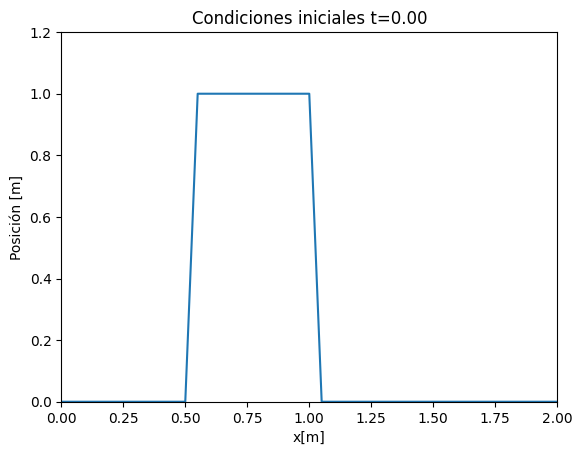

In [5]:
string.initialCond()

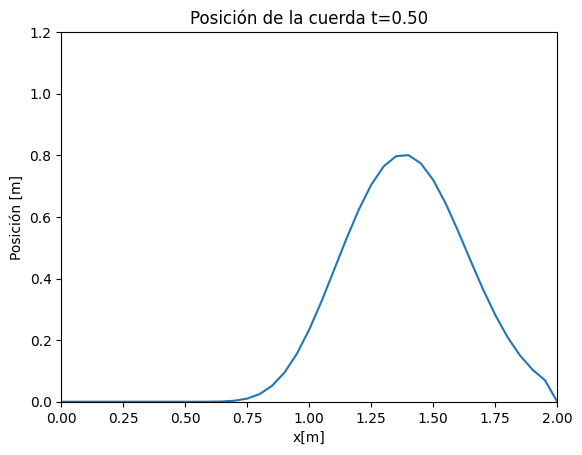

In [6]:
string.process()
string.graph()